In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


supply_data = pd.read_csv(r"C:\Users\vakom\Downloads\Supply_Data.csv")
demand_data = pd.read_csv(r"C:\Users\vakom\Downloads\Demand_Data.csv")

demand_data['Date'] = pd.to_datetime(demand_data['Date']) 
supply_data['Date'] = pd.to_datetime(supply_data['Date']) 

merged_df = pd.merge(demand_data, supply_data, how='inner', on=['Date'])
merged_df['Day_of_week'] = merged_df['Date'].dt.dayofweek
merged_df['Hours'] = merged_df['Date'].dt.hour
merged_df['Demand'] = merged_df['People saw 0 cars (unique)'] + merged_df['People saw +1 cars (unique)']
merged_df.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,Day_of_week,Hours,Demand
0,2016-12-18 23:00:00,9,32,78,52,18,6,11,0.3,0.67,12.0,6,23,41
1,2016-12-18 22:00:00,29,64,69,59,20,11,9,0.3,1.40,28.0,6,22,93
2,2016-12-18 21:00:00,5,39,89,72,25,7,18,0.3,0.64,16.0,6,21,44
3,2016-12-18 20:00:00,13,48,79,86,29,7,23,0.3,0.52,15.0,6,20,61
4,2016-12-18 19:00:00,12,77,87,82,31,14,17,0.4,1.16,36.0,6,19,89


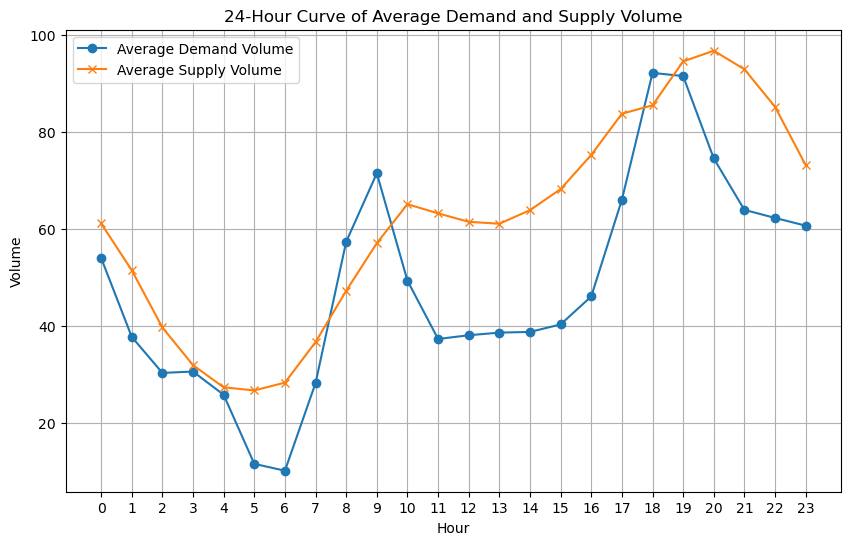

In [3]:
# Calculate average demand and supply volume for each hour
avg_demand_volume = merged_df.groupby(merged_df['Hours'])['Demand'].mean()
avg_supply_volume = merged_df.groupby(merged_df['Hours'])['Active drivers'].mean()

# Plot 24-hour curve of average demand and supply volume
plt.figure(figsize=(10, 6))
plt.plot(avg_demand_volume, label='Average Demand Volume', marker='o')
plt.plot(avg_supply_volume, label='Average Supply Volume', marker='x')
plt.title('24-Hour Curve of Average Demand and Supply Volume')
plt.xlabel('Hour')
plt.ylabel('Volume')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

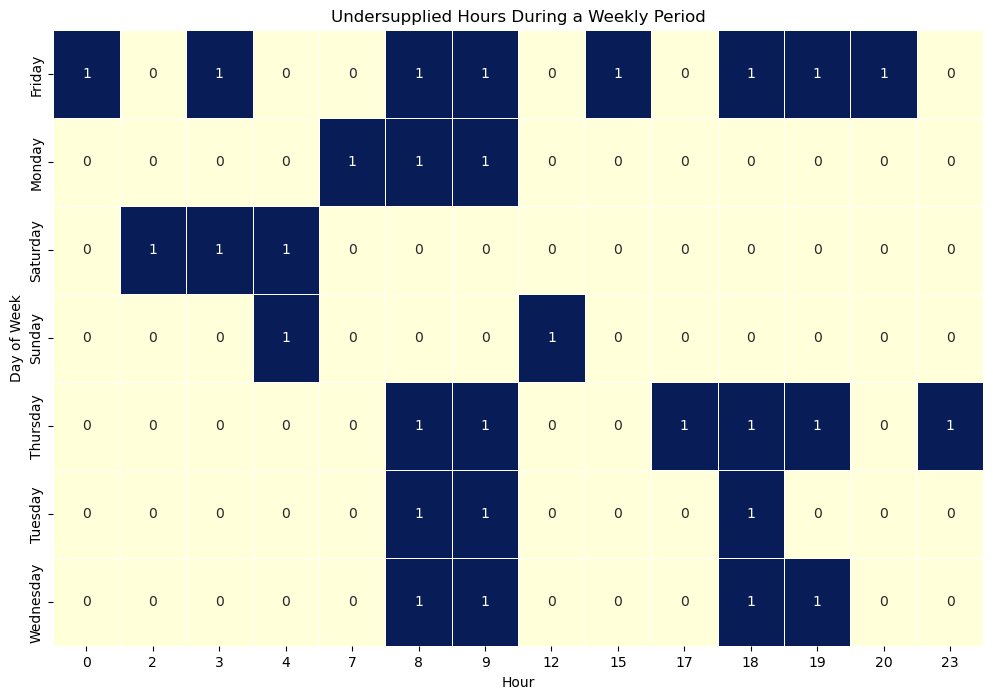

In [4]:
grouped_data = merged_df[['Day_of_week', 'Hours', 'Demand','Active drivers']]
grouped_data = grouped_data.groupby(['Day_of_week', 'Hours']).sum().reset_index()
undersupplied_hours = grouped_data[grouped_data['Demand'] > grouped_data['Active drivers']].reset_index()


# Define day of week names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert to DataFrame
df = pd.DataFrame(undersupplied_hours, columns=['Day_of_week', 'Hours'])

# Map numerical day of week to day names
df['Day_of_week'] = df['Day_of_week'].map(lambda x: day_names[x])

# Create a pivot table to prepare data for heatmap
pivot_df = df.pivot_table(index='Day_of_week', columns='Hours', aggfunc=len, fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar=False)
plt.title('Undersupplied Hours During a Weekly Period')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()

In [13]:
peak_hours = avg_demand_volume.nlargest(3).index.tolist()


Question_2_df = merged_df[merged_df['Hours'].isin(peak_hours)]
Question_2_df = Question_2_df.reset_index() 
Question_2_df = Question_2_df[['People saw 0 cars (unique)', 'People saw +1 cars (unique)', 'Coverage Ratio (%)', 'Online (h)', 'Hours', 'Demand']].groupby('Hours').mean().reset_index()


desired_coverage_ratio = 90


Question_2_df['Required Online Hours'] = Question_2_df['Online (h)']/Question_2_df['People saw +1 cars (unique)'] * Question_2_df['Demand'] *desired_coverage_ratio/100

num_hrs = Question_2_df['Online (h)'].sum() / len(Question_2_df)
required_num_hrs = Question_2_df['Required Online Hours'].sum() / len(Question_2_df)


print(f"Average number of online hours: {num_hrs}")
print(f"Average required number of online hours: {required_num_hrs}")

Average number of online hours: 36.59047619047619
Average required number of online hours: 43.08967588641341


In [10]:
Question_2_df.head()

,Hours,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Online (h),Demand,Required Online Hours
0,18,26.514286,65.714286,77.600000,33.200000,92.228571,41.935930
1,19,22.485714,69.085714,80.657143,37.400000,91.571429,44.615509
2,20,13.028571,61.542857,86.800000,39.171429,74.571429,42.717589


In [9]:
average_ride_value = 10 
driver_share_percentage = 0.8 

Question_3_df = merged_df[merged_df['Hours'].isin(peak_hours)].reset_index()


Question_3_df = Question_3_df[['People saw 0 cars (unique)', 'Finished Rides', 'Active drivers','Hours']].groupby('Hours').mean().reset_index()


Question_3_df['Earnings_per_peak_hour'] = Question_3_df['Finished Rides'] / Question_3_df['Active drivers'] * average_ride_value * driver_share_percentage


Question_3_df['total_missed_coverage_earnings'] = Question_3_df['People saw 0 cars (unique)'] / Question_3_df['Active drivers'] * average_ride_value * driver_share_percentage

average_income_per_hour = Question_3_df['Earnings_per_peak_hour'].sum()/len(Question_3_df)
average_guaranteed_income_per_hour = (Question_3_df['total_missed_coverage_earnings'] + Question_3_df['Earnings_per_peak_hour']).sum() / len(Question_3_df)


print(f"Average  income per hour for a driver during peak hours: {average_income_per_hour}")
print(f"Average guaranteed income per hour for a driver during peak hours: {average_guaranteed_income_per_hour}")

Average  income per hour for a driver during peak hours: 2.258938592951227
Average guaranteed income per hour for a driver during peak hours: 4.07824115262671


In [14]:
Question_3_df.head()

,Hours,People saw 0 cars (unique),Finished Rides,Active drivers,Earnings_per_peak_hour,total_missed_coverage_earnings
0,18,26.514286,26.600000,85.542857,2.487642,2.479626
1,19,22.485714,27.600000,94.600000,2.334038,1.901540
2,20,13.028571,23.657143,96.800000,1.955136,1.076741


In [ ]:
Question_3_df = merged_df[merged_df['Hours'].isin(peak_hours)].reset_index()

average_ride_value = 10 
driver_share_percentage = 0.8  
company_share_percentage = 1 - driver_share_percentage

#active drviers

# Step 1: Calculate total earnings from completed rides for all drivers during peak hours
total_finished_rides = Question_3_df['Finished Rides'].sum()
total_earnings = total_finished_rides * average_ride_value

# Step 2: Calculate guaranteed earnings for all drivers (80% of total earnings)
total_guaranteed_earnings = total_earnings * driver_share_percentage

# Step 3: Determine additional earnings needed to guarantee a certain income for all drivers
total_missed_coverage_earnings = Question_3_df['People saw 0 cars (unique)'].sum() * average_ride_value * driver_share_percentage

# Step 4: Calculate total guaranteed income for all drivers
total_guaranteed_income = total_guaranteed_earnings + total_missed_coverage_earnings

# Step 5: Calculate the total number of peak hours
total_peak_hours = len(Question_3_df)

# Step 6: Calculate the average guaranteed income per hour for all drivers during peak hours
average_guaranteed_income_per_hour = total_guaranteed_income / total_peak_hours

print("Average guaranteed income per hour for all drivers during peak hours with:", average_guaranteed_income_per_hour, "euros")